<a href="https://colab.research.google.com/github/draglar/Moringa-dsc6/blob/master/IP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Assessment


>>Overview

In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

>>Research Question

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 
>>>Bonus Questions (Optional)

What is the most popular hour for returning cars?
What station is the most popular?
Overall?
At the most popular picking hour?
What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
Overall?
At the most popular picking hour?
Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 
Your final deliverable will be a data report
Hint:

To compute usage, we will need to understand that we have to join successive (in time) measures/counters for a given station, as the difference will tell whether a car was picked up, returned, or nothing happened.

The CRISP-DM methodology will guide you while working on the Data Report. Your Data Report will also need to have an objective account, with insights majorly coming from the dataset. However, you can refer to external information for supporting information. 

You can use either SQL/Python for this project.



##importing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [371]:
df=pd.read_csv('Autolib_dataset (2).csv')
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


##Data preparation

In [ ]:
df.isna().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [ ]:
df['Scheduled at'].count()

47

Based on the data all the stations that have been scheduled are yet to be made active,meaning they are unnecessary.
They will be purged, in turn the column scheduled at will also be irrelevant.

the task at hand only requires the city of Paris

In [ ]:
df.City.unique()

array(['Paris', 'Le Bourget', 'Nanterre', 'Puteaux', 'Fontenay-aux-Roses',
       'Le Chesnay', 'Suresnes', 'Versailles', 'Malakoff',
       'Issy-les-Moulineaux', 'Saint-Cloud', 'SÃ¨vres', 'Bezons',
       'Nogent-sur-Marne', 'CrÃ©teil', 'Villejuif', 'Rueil-Malmaison',
       'Villeneuve-la-Garenne', 'Montreuil', 'Charenton-le-Pont',
       'Courbevoie', 'AsniÃ¨res-sur-Seine', 'Garches', 'Drancy',
       'La Garenne-Colombes', 'VerriÃ¨res-le-Buisson', 'Le Blanc-Mesnil',
       'Vanves', 'Enghien-les-Bains', 'Sceaux', 'Levallois-Perret',
       'Boulogne-Billancourt', 'ChÃ¢tenay-Malabry', 'Pantin', 'Meudon',
       'Gennevilliers', 'Vincennes', 'Rungis', 'Colombes',
       'Fontenay-Sous-Bois', 'Rosny-sous-Bois', 'Bourg-la-Reine',
       'Cachan', 'Maisons-Alfort', 'Alfortville', 'Champigny-sur-Marne',
       'Aulnay-sous-bois', 'Saint-Denis', 'Le Plessis-Robinson',
       'Le PrÃ©-Saint-Gervais', 'Clamart', 'Bois-Colombes', 'Bagnolet',
       'Vaucresson', 'Limeil-BrÃ©vannes', 'Saint-

so many cities,All except paris need to be dropped

In [ ]:
 df['Rental status'].unique()

array(['operational', 'broken', 'future', 'nonexistent'], dtype=object)

only the operational Stations should have any impact on the analysis

###Data cleaning

###validity

In [372]:
df=df[(df['Rental status']=='operational')|(df['Rental status']=='broken')]

In [373]:
df_p=df[df['City']=='Paris']

In [374]:
df.drop(['Displayed comment','Scheduled at','City','Rental status','Status','year'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


###accuracy

In [406]:
df.count()

Address                4950
Cars                   4950
Bluecar counter        4950
Utilib counter         4950
Utilib 1.4 counter     4950
Charge Slots           4950
Charging Status        4950
ID                     4950
Kind                   4950
Geo point              4950
Postal code            4950
Public name            4950
Slots                  4950
Station type           4950
Subscription status    4950
month                  4950
day                    4950
hour                   4950
minute                 4950
dtype: int64

In [408]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))].count()

Address                  0
Cars                     0
Bluecar counter          0
Utilib counter         286
Utilib 1.4 counter     569
Charge Slots           994
Charging Status          0
ID                       0
Kind                     0
Geo point                0
Postal code              0
Public name              0
Slots                    0
Station type             0
Subscription status      0
month                    0
day                      0
hour                     0
minute                   0
dtype: int64

having Utilib counter and Utilib 1.4 counter seems improbable because its dependent on the location of the Station, therefore i will not remove the outliers

###completeness

In [239]:
df.isna().sum()

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Slots                  0
Station type           0
Subscription status    0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2961 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              2961 non-null   object
 1   Cars                 2961 non-null   int64 
 2   Bluecar counter      2961 non-null   int64 
 3   Utilib counter       2961 non-null   int64 
 4   Utilib 1.4 counter   2961 non-null   int64 
 5   Charge Slots         2961 non-null   int64 
 6   Charging Status      2961 non-null   object
 7   ID                   2961 non-null   object
 8   Kind                 2961 non-null   object
 9   Geo point            2961 non-null   object
 10  Postal code          2961 non-null   int64 
 11  Public name          2961 non-null   object
 12  Slots                2961 non-null   int64 
 13  Station type         2961 non-null   object
 14  Subscription status  2961 non-null   object
 15  month                2961 non-null   int64 
 16  day   

###consistency

In [237]:
df.duplicated().sum()

0

Blue cars

In [376]:
blue=df_p[['ID','Postal code','Slots','Charge Slots','Bluecar counter','day','hour','minute']]

In [377]:
blue=blue[blue['Bluecar counter']>0]

##Analysis

####Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris

8 pm

getting sum of all vehicles in the stations per hour

In [429]:
blue[['Bluecar counter']].groupby(by=blue['hour']).sum().sort_values('Bluecar counter',ascending=True).head(3)

,Bluecar counter
hour,
20,149
14,163
17,187


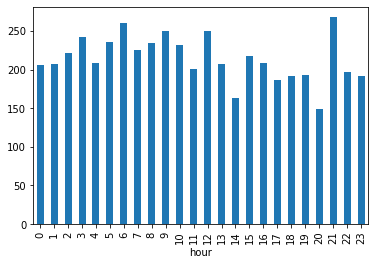

In [418]:
blue['Bluecar counter'].groupby(by=blue['hour']).sum().plot(kind='bar')

####What is the most popular hour for returning cars?

9 pm

In [ ]:
blue[['Bluecar counter']].groupby(by=blue['hour']).sum().sort_values('Bluecar counter',ascending=False).head(3)

,Bluecar counter
hour,
21,268
6,260
12,250


####What station is the most popular?

Overall

paris-portedemontrouge-8

gettting the Stations with the highest count as they will be most accessed

In [392]:
df.pivot_table(index=df['ID'] ,values = "Bluecar counter" , aggfunc ='count').sort_values('Bluecar counter',ascending=False).head(3)

,Bluecar counter
ID,
paris-portedemontrouge-8,13
paris-courcelles-69,11
sevres-wolfenbuttel-1,11


at the most popular picking hour

paris-tronchet-19

In [401]:
df.pivot_table(index=df[['ID','hour']] ,values = "Bluecar counter" , aggfunc ='count').sort_values('Bluecar counter',ascending=False).head(3)

,,Bluecar counter
ID,hour,
paris-tronchet-19,21,4
paris-paradis-28,20,4
paris-fabredeglantine-2,0,3


####What postal code is the most popular for picking up Blue cars?

Postal code 75015

gettting the Postal code with the highest count as they will be most accessed

In [411]:
blue.pivot_table(index=blue['Postal code'] ,values = "Bluecar counter" , aggfunc ='count').sort_values('Bluecar counter',ascending=False).head(3)

,Bluecar counter
Postal code,
75015,195
75016,181
75017,177


Does the most popular station belong to that postal code?

Overall?
No

In [412]:
df[['ID','Postal code']][df.ID=='paris-portedemontrouge-8']

,ID,Postal code
122,paris-portedemontrouge-8,75014
194,paris-portedemontrouge-8,75014
360,paris-portedemontrouge-8,75014
1010,paris-portedemontrouge-8,75014
1282,paris-portedemontrouge-8,75014
1527,paris-portedemontrouge-8,75014
2112,paris-portedemontrouge-8,75014
2179,paris-portedemontrouge-8,75014
2991,paris-portedemontrouge-8,75014
3307,paris-portedemontrouge-8,75014


At popular picking hour

In [413]:
df[['ID','Postal code']][df.ID=='paris-tronchet-19']

,ID,Postal code
600,paris-tronchet-19,75008
1630,paris-tronchet-19,75008
2172,paris-tronchet-19,75008
2873,paris-tronchet-19,75008
2885,paris-tronchet-19,75008
3219,paris-tronchet-19,75008
4129,paris-tronchet-19,75008


Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?